# **Bienvenido a DRE en Colab!!**

Este es un notebook de ejemplo que sirve de guía rápida para usar DRE en Colab. En Colab puedes correr Python de forma interactiva igual que con Jupyter-Notebooks, pero además permite aceleración por GPU y además puedes acceder directamente a los archivos de Google Drive.

Puedes ejecutar cualquier celda de este documento sin problemas. Si quieres usarlo como planilla para tus propios trabajos puedes guardarlo con `Copiar en Drive`. 

Una vez copiado puedes conectar el notebook con tu Google Drive, para esto ve a la pestaña de archivos en la barra a la izquierda y haz click en la carpeta con el ícono de Drive para activarlo (solo es necesario hacerlo una vez por notebook). Una vez activado podrás ver tus archivos de Drive en esa pestaña.

# Directorio de trabajo

Como se menciona en la documentación, es conveniente tener un directorio de trabajo ordenado antes de usar DRE. Sube los directorios `Tiles`, `Sextracted`, `PSF` y `Cuts` a Drive antes de comenzar. 

Para movernos al directorio de trabajo podemos usar:


```
cd /content/drive/MyDrive/path_to_my_working_directory
```
(debes cambiar `path_to_my_working_directory` por la dirección desde la raíz de to Drive)

En este caso usaremos los archivos de ejemplo de DRE: (proximamente, aún no los tengo jajaja)


In [ ]:
%cd /content/drive/MyDrive/Astronomia/Practica/DRE

/content/drive/MyDrive/Astronomia/Practica/DRE


In [ ]:
ls -l

total 177478
drwx------ 2 root root      4096 May 11 00:35 Chi/
drwx------ 2 root root      4096 May 14 19:02 Chi_CPU/
drwx------ 2 root root      4096 May 21 19:31 Chi_old/
drwx------ 2 root root      4096 May 28 17:24 Chi_phot/
drwx------ 2 root root      4096 May 28 17:26 Chi_psfex/
drwx------ 2 root root      4096 May 27 22:46 Cuts/
drwx------ 2 root root      4096 May 28 15:03 Cuts_old/
-rw------- 1 root root   1408582 May 28 22:47 DRE_GPU.ipynb
drwx------ 2 root root      4096 May 14 19:37 Fake_data/
-rw------- 1 root root 178917120 Mar 30 01:46 modelbulge.fits
-rw------- 1 root root     28800 May 28 15:38 photutils_SPT_F110W.psf
-rw------- 1 root root     16840 May 18 21:49 photutils_SPT_F110W_psf.h5
drwx------ 2 root root      4096 May 28 02:04 PSFex/
drwx------ 2 root root      4096 May 28 14:53 PSF_phot/
-rw------- 1 root root    371520 Apr 18 23:50 PSFSTD_WFC3IR_F110W.fits
drwx------ 2 root root      4096 May 14 19:06 Sextracted/
drwx------ 2 root root      4096 May 21 00:44

# Entorno de ejecución

Google Colab admite distintos entornos de ejecución que puedes administrar desde `Entornos de ejecución` en la barra superior. Para asegurarte de que estás usando aceleración por GPU podemos verificar la tarjeta disponible con este comando:

In [ ]:
!nvidia-smi

Fri May 28 23:40:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Si no vez este recuadro como salida debes cambiar el tipo de entorno, para eso ve a `Entorno de ejecución -> Cambiar tipo de entorno de ejecución` y selecciona aceleración por GPU. 

Nota: Google es estricto con los usuarios de Colab gratuito con el tiempo de GPU, si dejas el notebook en desuso por un tiempo (~1/2 hora) probablemente interrumpirá la ejecución y esto significa perder todos los cambios que no se hayan guardado en Google Drive (los archivos guardados fuera de Drive también se pierden), es importante guardar todos los cambios en Drive cada cierto tiempo. Una opción es cambiar el entorno a CPU (aceleración None) cuando no lo estés usando de manera concurrente.

Nota 2: A veces notarás que los calculos ocurren a distinta velocidad, esto se debe a que administra los recursos de forma automática según la disponibilidad y puede que te toque un módulo más rápido o más lento.

# Descargar DRE

Puedes instalar DRE directamente desde Github:

In [ ]:
! pip install git+https://github.com/Cnmoya/DRE.git#egg=DRE --upgrade

  Cloning https://github.com/furcelay/DRE.git to /tmp/pip-install-62ehnjqp/DRE
  Running command git clone -q https://github.com/furcelay/DRE.git /tmp/pip-install-62ehnjqp/DRE
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 839kB 8.5MB/s 
  Created wheel for DRE: filename=DRE-0.0.1-cp37-none-any.whl size=19109 sha256=168adbd02af47ba5acb1d02602253888e6678fd5ed33d34cbd28df89e7140d5a
  Stored in directory: /tmp/pip-ephem-wheel-cache-fxxp0vlu/wheels/b1/b6/99/f8808d09ac26fc49e7630c394f7f27a3776313dcaa20f8a14e
Successfully built DRE


Luego importamos el módulo de DRE para Colab:

In [ ]:
from DRE import colab as dre

# Cargar el modelo y realizar el ajuste

In [ ]:
model = dre.ModelGPU('modelbulge.fits')

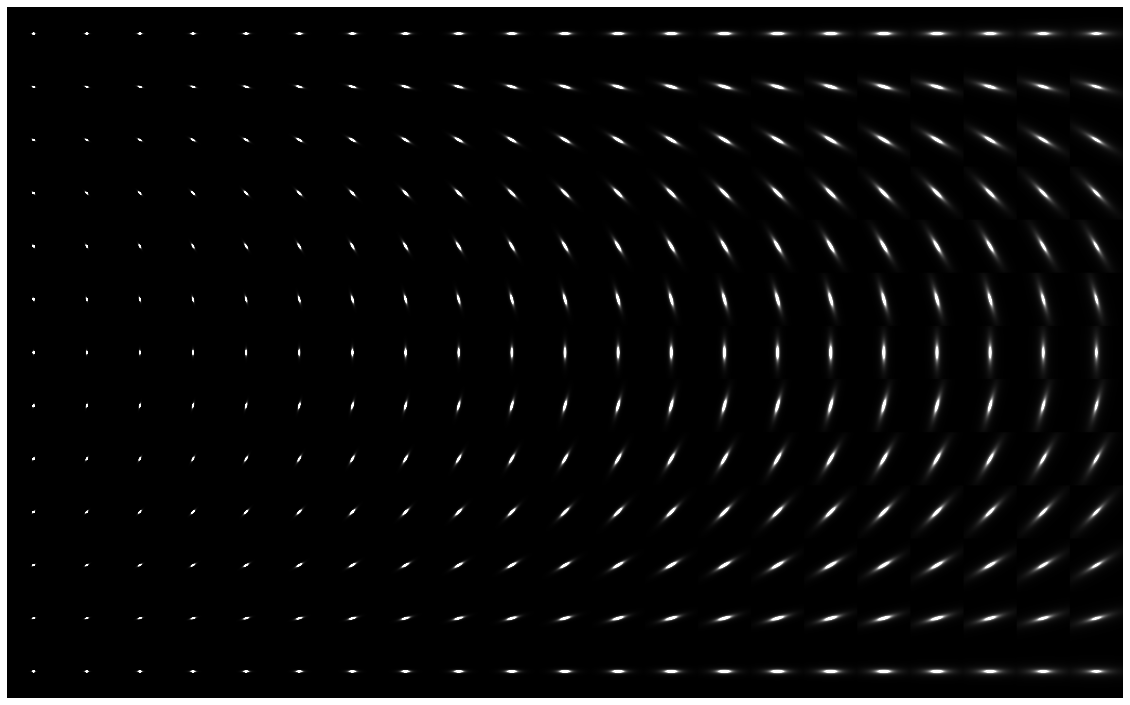

In [ ]:
model.visualize_model(1)

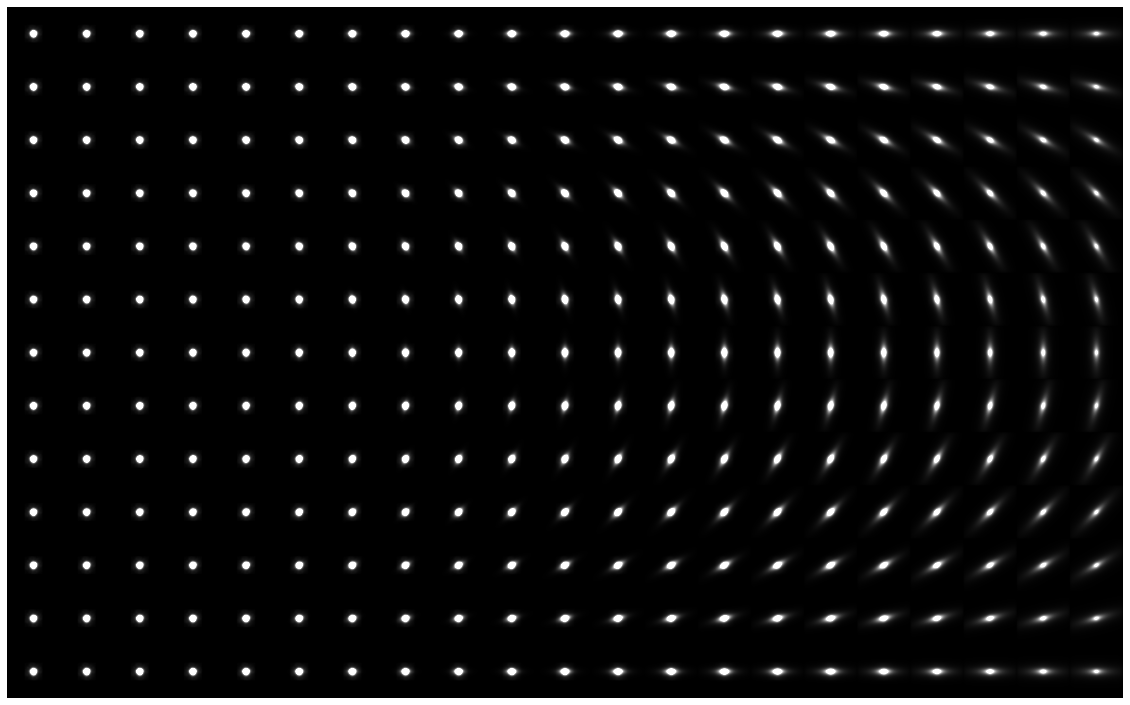

In [ ]:
model.visualize_model(1, psf=f"PSF/SPT-CLJ0002-5557_F110W_0.03g1.0_cr2.5_0.7_drz_sci.psf")

In [ ]:
model.fit_dir('Cuts', 'Chi', 'PSF')

(2/2): 100%|██████████| 468/468 [00:35<00:00, 13.02it/s]


# Resultados

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

In [ ]:
results = dre.Results(model, recompute=True)

In [ ]:
results[0]

<QTable length=403>
 ROW  EXT_NUMBER NUMBER R_IDX ... ELONGATION FLAGS   CLASS_STAR  FWHM_IMAGE
int64   int64    int64  int64 ...  float32   int16    float32     float32  
----- ---------- ------ ----- ... ---------- ----- ------------- ----------
    0          0     19    18 ...   1.526316     0  0.0055688294   12.94768
    1          0     21    14 ...   1.085977     0   0.060713045  12.012051
    2          0     23    20 ...  1.2617403     0    0.31600538  10.160532
    3          0     25    18 ...  1.6382945     0  0.0019902429  14.389552
    4          0     26    20 ...  2.1906464     0  0.0008155962  19.343403
    5          0     27    20 ...  3.5616677     0 0.00020183247   42.75833
    6          0     29    20 ...  1.9401582     0   0.070464544  11.734882
    7          0     31    20 ...  2.1772506     0    0.39541557   7.534239
    8          0     32    20 ...  1.3560214     0 0.00016813891  31.334152
    9          0     34    20 ...  5.7448316     0  0.0002959492   7

65
Photutils


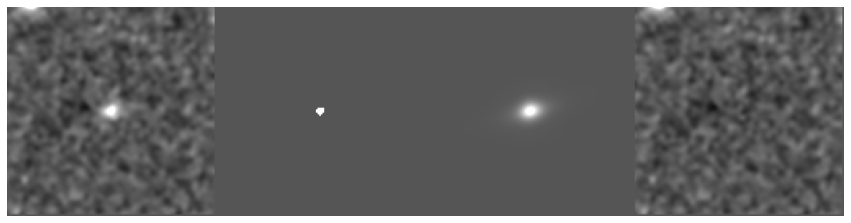

PSFex


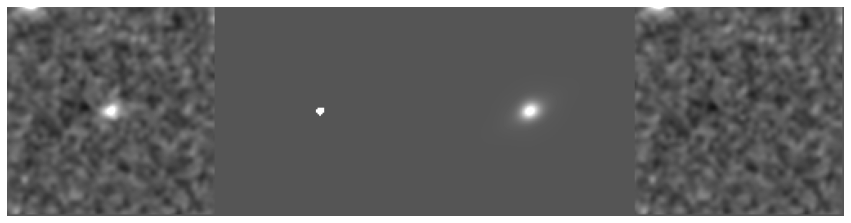

In [ ]:
i = np.random.randint(len(results[0]))
print(i)
results[0].make_mosaic(i, vmin=-0.01, vmax=0.02)

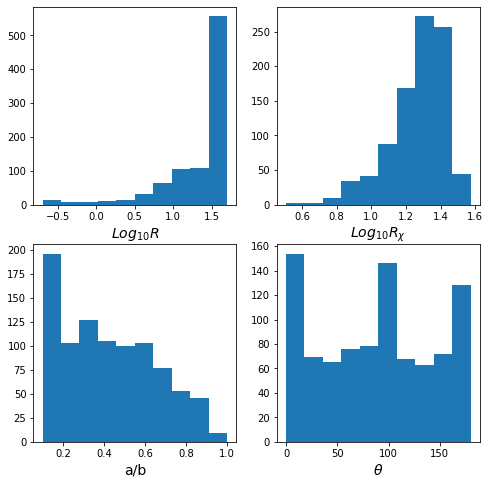

In [ ]:
results.hist()

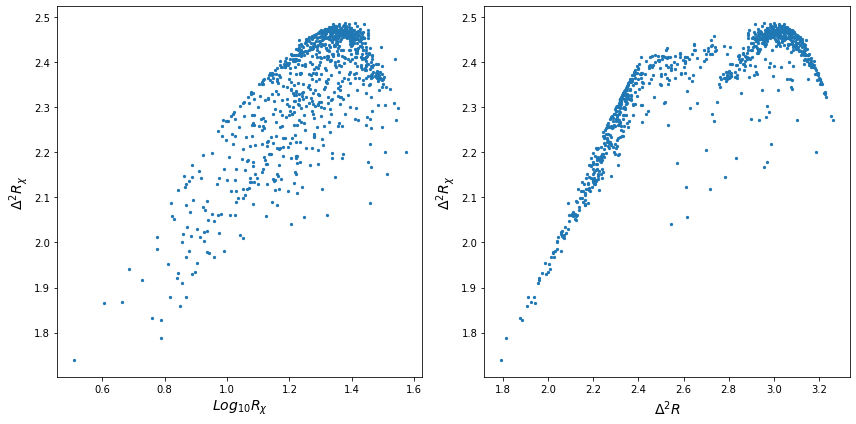

In [ ]:
results.plot()

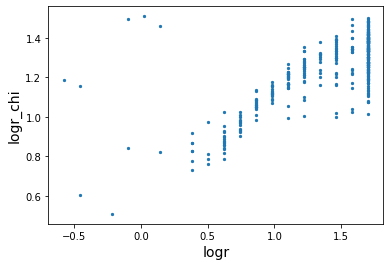

In [ ]:
results[0].plot('LOGR', 'LOGR_CHI')

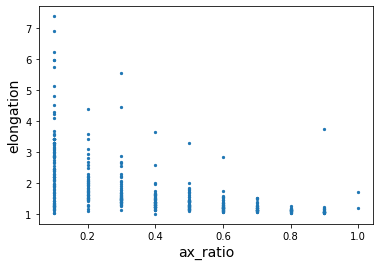

In [ ]:
results[0].plot('AX_RATIO', 'ELONGATION')

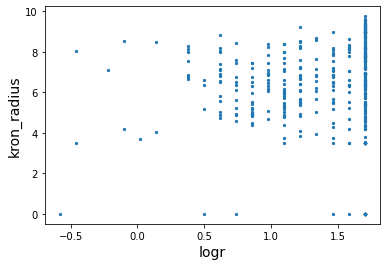

In [ ]:
results[0].plot('LOGR', 'KRON_RADIUS')

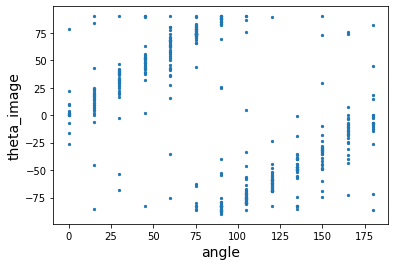

In [ ]:
results[0].plot('ANGLE', 'THETA_IMAGE')

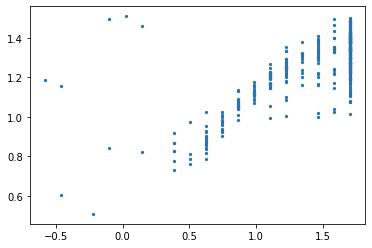

In [ ]:
plt.scatter(results[0]['LOGR'], results[0]['LOGR_CHI'], s=5)
plt.show()

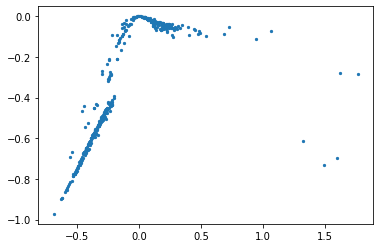

In [ ]:
plt.scatter(results[0]['LOGR_CHI'] - results[0]['LOGR'], results[0]['LOGR_CHI_VAR'] - results[0]['LOGR_VAR'], s=5)
plt.show()

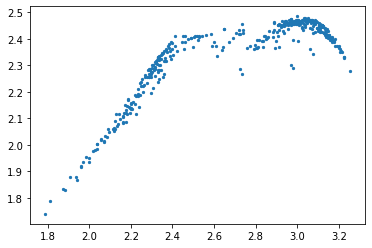

In [ ]:
plt.scatter(results[0]['LOGR_VAR'], results[0]['LOGR_CHI_VAR'], s=5)
plt.show()